In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
glob.glob('/content/drive/MyDrive/seminar/amazon/*.csv')
pd.options.display.max_columns=9000

In [3]:
sports = pd.read_csv('/content/drive/MyDrive/seminar/amazon/Sport and Outdoor.csv')
print(sports.shape)
sports.head()

(299232, 30)


,Unnamed: 0,Item_Title,Item_Rating,Item_Rating_Count,Item_Review_Count,Item_Answered_Question,User_Name,User_Link,Review_Rating,Review_Vertified,Review_Date,Review_Title,Review_Text,Review_Photo,Review_Video,Review_Helpfulness,User_Helpful_Votes,User_Reviews_Count,User_Ranking,User_Following,User_Vine,User_Hall,User_Label_1,User_Label_2,User_Verified,Category,Ranking,Prices,Reviews URL,Product URL
0,0,Hanes Men's EcoSmart Sweatshirt,4.6,107827,13165,361.0,Pham,https://www.amazon.com//gp/profile/amzn1.accou...,5.0,1,"April 30, 2018",Great sweater :),I bought this sweater in order to cosplay as N...,2,0,768,769.0,1.0,7409462.0,NaN,NaN,NaN,NaN,NaN,NaN,Sports & Outdoors,1,$4.99 - $29.95,https://www.amazon.com//product-reviews/B092NF...,https://www.amazon.com//Hanes-EcoSmart-Fleece-...
1,1,Hanes Men's EcoSmart Sweatshirt,4.6,107827,13165,361.0,april,https://www.amazon.com//gp/profile/amzn1.accou...,5.0,1,"March 11, 2018",NaN,"5'4'' 115lb, wanted an over sized sweatshirt t...",3,0,554,934.0,51.0,133650.0,NaN,NaN,NaN,Top Contributor,Pets,NaN,Sports & Outdoors,1,$4.99 - $29.95,https://www.amazon.com//product-reviews/B092NF...,https://www.amazon.com//Hanes-EcoSmart-Fleece-...
2,2,Hanes Men's EcoSmart Sweatshirt,4.6,107827,13165,361.0,B_West,https://www.amazon.com//gp/profile/amzn1.accou...,5.0,1,"January 18, 2020",Super cozy!,I usually like my hoodies a bit big to wear wi...,3,0,195,409.0,29.0,179991.0,NaN,NaN,NaN,NaN,NaN,NaN,Sports & Outdoors,1,$4.99 - $29.95,https://www.amazon.com//product-reviews/B092NF...,https://www.amazon.com//Hanes-EcoSmart-Fleece-...
3,3,Hanes Men's EcoSmart Sweatshirt,4.6,107827,13165,361.0,Jessica E.,https://www.amazon.com//gp/profile/amzn1.accou...,4.0,1,"October 19, 2019","Cozy, I wish I got medium",Update: I really like cozy crewnecks and I hav...,1,0,177,426.0,57.0,92778.0,4.0,NaN,NaN,NaN,NaN,NaN,Sports & Outdoors,1,$4.99 - $29.95,https://www.amazon.com//product-reviews/B092NF...,https://www.amazon.com//Hanes-EcoSmart-Fleece-...
4,4,Hanes Men's EcoSmart Sweatshirt,4.6,107827,13165,361.0,AshleyC35,https://www.amazon.com//gp/profile/amzn1.accou...,4.0,1,"October 16, 2019",Sizing up won't give extra length...unfortunately,"Got a 5xl hoping for an extra baggy, long, swe...",1,0,144,173.0,24.0,855919.0,1.0,NaN,NaN,NaN,NaN,NaN,Sports & Outdoors,1,$4.99 - $29.95,https://www.amazon.com//product-reviews/B092NF...,https://www.amazon.com//Hanes-EcoSmart-Fleece-...


In [4]:
sports.columns

Index(['Unnamed: 0', 'Item_Title', 'Item_Rating', 'Item_Rating_Count',
       'Item_Review_Count', 'Item_Answered_Question', 'User_Name', 'User_Link',
       'Review_Rating', 'Review_Vertified', 'Review_Date', 'Review_Title',
       'Review_Text', 'Review_Photo', 'Review_Video', 'Review_Helpfulness',
       'User_Helpful_Votes', 'User_Reviews_Count', 'User_Ranking',
       'User_Following', 'User_Vine', 'User_Hall', 'User_Label_1',
       'User_Label_2', 'User_Verified', 'Category', 'Ranking', 'Prices',
       'Reviews URL', 'Product URL'],
      dtype='object')

In [5]:
sports = sports.loc[:,['Item_Title','User_Name','Review_Rating']]
sports = sports.rename(columns={'Item_Title':'Item_Id','User_Name':'User_Id'})
# sports = sports.drop_duplicates(sports)
print(sports.shape)
sports.head(10)

(299232, 3)


,Item_Id,User_Id,Review_Rating
0,Hanes Men's EcoSmart Sweatshirt,Pham,5.0
1,Hanes Men's EcoSmart Sweatshirt,april,5.0
2,Hanes Men's EcoSmart Sweatshirt,B_West,5.0
3,Hanes Men's EcoSmart Sweatshirt,Jessica E.,4.0
4,Hanes Men's EcoSmart Sweatshirt,AshleyC35,4.0
5,Hanes Men's EcoSmart Sweatshirt,Littlebig,5.0
6,Hanes Men's EcoSmart Sweatshirt,RW,5.0
7,Hanes Men's EcoSmart Sweatshirt,Tom,4.0
8,Hanes Men's EcoSmart Sweatshirt,JenacideByBibliophile,4.0
9,Hanes Men's EcoSmart Sweatshirt,Alex,5.0


In [6]:
print(sports['User_Id'].isnull().sum())

16


In [7]:
sports = sports[sports['User_Id'].notna()]
print(sports.shape)
print(sports.head())

(299216, 3)
                           Item_Id     User_Id  Review_Rating
0  Hanes Men's EcoSmart Sweatshirt        Pham            5.0
1  Hanes Men's EcoSmart Sweatshirt      april             5.0
2  Hanes Men's EcoSmart Sweatshirt      B_West            5.0
3  Hanes Men's EcoSmart Sweatshirt  Jessica E.            4.0
4  Hanes Men's EcoSmart Sweatshirt   AshleyC35            4.0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['User_Id','Item_Id']

sports_2 = sports.copy()
for col in columns:
  sports_2[col] = le.fit_transform(list(sports_2[col]))

sports_2.head()

,Item_Id,User_Id,Review_Rating
0,43,124429,5.0
1,43,165994,5.0
2,43,15417,5.0
3,43,72732,4.0
4,43,13399,4.0


# 1. Best-Seller

In [9]:
X = sports_2.copy()
y = sports_2['User_Id']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True,test_size=0.2) # stratify적용 불가능 --> 유저 비율이 불균형하므로 User_Id를 train,test에 전부 사용 불가
def RMSE(y_true,y_pred):
  return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,item) for (user,item) in id_pairs])
  y_true = np.array(X_test['Review_Rating'])
  return RMSE(y_true,y_pred)

rating_matrix = X_train.pivot_table(index='User_Id', columns='Item_Id', values='Review_Rating')  # pivot_table 사용(pivot X)
rating_matrix

Item_Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
User_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 베스트셀러 모델 
# 전체 아이템의 평균 평점 계산해서 베스트 셀러 모델 추천

def simple_best_seller(user_id,item_id):
  try:
    rating = train_mean['Item_Id']
  except:
    rating = 3.0
  
  return rating

train_mean = X_train.groupby('Item_Id')['Review_Rating'].mean()
score(simple_best_seller)

1.7851617161433597

In [11]:
# MAE 테스트
from sklearn.metrics import mean_absolute_error
def MAE(y_true,y_pred):
  return mean_absolute_error(y_true,y_pred)

def score_2(model):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,item) for (user,item) in id_pairs])
  y_true = np.array(X_test['Review_Rating'])
  return MAE(y_true,y_pred)



score_2(simple_best_seller)

1.678814918788851

In [12]:
# 베스트 셀러 추천(5개)
# 아이템의 평점평균 --> 평균값이 가장 높은 아이템 추천


item_mean = sports_2.groupby('Item_Id')['Review_Rating'].mean()
def recomm_best_seller(n_items):
  item_sort = item_mean.sort_values(ascending=False)[:n_items]
  for idx in item_sort.index:
    print(f'item_no_{idx} : ', le.classes_[idx])
    

recomm_best_seller(5) 

item_no_88 :  Vgogfly Slouchy Beanie for Men Winter Hats for Guys Cool Beanies Mens Lined Knit Warm…
item_no_64 :  Nalgene Wide Mouth Water Bottle
item_no_13 :  BalanceFrom GoYoga+ All-Purpose 1/2-Inch Extra Thick High Density Anti-Tear Exercise…
item_no_58 :  LifeStraw Personal
item_no_91 :  Wise Owl Outfitters Camping Hammocks - Portable Hammock Single or Double…


# 2. 코사인 유사도 & 이웃고려 UBCF



In [13]:
# 전체 유저 대상 코사인 유사도 계산시 램 터지는 현상 발생
# --> 리뷰를 5개 이상 남긴 User_Id에 대해서만 CF 진행
 
sports_3 = sports_2.groupby('User_Id').filter(lambda x: x['Review_Rating'].count() >= 5)

print(sports_3.shape)
sports_3.head()

(88669, 3)


,Item_Id,User_Id,Review_Rating
6,43,127469,5.0
7,43,155167,4.0
9,43,4818,5.0
10,43,107130,5.0
18,43,26041,5.0


In [14]:
sports_3 = sports.groupby('User_Id').filter(lambda x: x['Review_Rating'].count() >= 5)

columns = ['User_Id','Item_Id']

for col in columns:
  sports_3[col] = le.fit_transform(list(sports_3[col]))

sports_3.head()

,Item_Id,User_Id,Review_Rating
6,43,2333,5.0
7,43,2787,4.0
9,43,85,5.0
10,43,1996,5.0
18,43,483,5.0


In [15]:
X = sports_3.copy()
y = sports_3['User_Id']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True,test_size=0.2) # stratify적용 불가능 --> 유저 비율이 불균형하므로 User_Id를 train,test에 전부 사용 불가
def RMSE(y_true,y_pred):
  return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,item) for (user,item) in id_pairs])
  y_true = np.array(X_test['Review_Rating'])
  return RMSE(y_true,y_pred)

rating_matrix = X_train.pivot_table(index='User_Id', columns='Item_Id', values='Review_Rating')  # pivot_table 사용(pivot X)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
matrix_dummy = rating_matrix.fillna(0)
user_sim = cosine_similarity(matrix_dummy,matrix_dummy)
user_sim = pd.DataFrame(user_sim, index=rating_matrix.index, columns=rating_matrix.index)
user_sim

User_Id      0         1        2         3         4         5         6     \
User_Id                                                                        
0        1.000000  0.000000  0.00000  0.418716  0.096056  0.000000  0.000000   
1        0.000000  1.000000  0.00000  0.000000  0.234401  0.000000  0.000000   
2        0.000000  0.000000  1.00000  0.000000  0.155620  0.164371  0.210538   
3        0.418716  0.000000  0.00000  1.000000  0.202675  0.090222  0.000000   
4        0.096056  0.234401  0.15562  0.202675  1.000000  0.136071  0.167989   
...           ...       ...      ...       ...       ...       ...       ...   
3381     0.195628  0.221578  0.00000  0.000000  0.192527  0.000000  0.000000   
3382     0.000000  0.000000  0.00000  0.000000  0.203861  0.000000  0.000000   
3383     0.000000  0.090640  0.00000  0.000000  0.185513  0.000000  0.000000   
3384     0.000000  0.061869  0.00000  0.000000  0.207668  0.000000  0.376889   
3385     0.000000  0.000000  0.00000  0.136752  0.254702  0.000000  0.231125   

User_Id      7         8         9         10        11        12        13    \
User_Id                                                                         
0        0.054477  0.000000  0.000000  0.000000  0.000000  0.000000  0.194822   
1        0.039490  0.000000  0.229416  0.000000  0.268879  0.058963  0.235376   
2        0.000000  0.000000  0.188311  0.000000  0.220704  0.161327  0.000000   
3        0.000000  0.000000  0.000000  0.284495  0.193828  0.000000  0.000000   
4        0.213375  0.220126  0.285483  0.268815  0.232453  0.138378  0.147734   
...           ...       ...       ...       ...       ...       ...       ...   
3381     0.207814  0.000000  0.000000  0.000000  0.000000  0.000000  0.247731   
3382     0.074536  0.067666  0.000000  0.000000  0.000000  0.309137  0.000000   
3383     0.085010  0.000000  0.000000  0.000000  0.000000  0.126929  0.000000   
3384     0.058026  0.000000  0.000000  0.000000  0.000000  0.086639  0.000000   
3385     0.000000  0.242285  0.206725  0.227596  0.000000  0.000000  0.000000   

User_Id      14        15        16        17        18        19        20    \
User_Id                                                                         
0        0.000000  0.000000  0.000000  0.000000  0.188061  0.000000  0.000000   
1        0.183533  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2        0.000000  0.332377  0.000000  0.163409  0.000000  0.224574  0.000000   
3        0.206725  0.121626  0.053024  0.035878  0.191939  0.000000  0.000000   
4        0.259189  0.193011  0.211967  0.169501  0.209262  0.275503  0.103865   
...           ...       ...       ...       ...       ...       ...       ...   
3381     0.000000  0.000000  0.000000  0.134098  0.179351  0.000000  0.000000   
3382     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3383     0.000000  0.000000  0.000000  0.000000  0.000000  0.184053  0.176581   
3384     0.000000  0.026444  0.000000  0.000000  0.000000  0.000000  0.000000   
3385     0.000000  0.081084  0.000000  0.000000  0.076776  0.000000  0.000000   

User_Id      21        22        23        24        25        26        27    \
User_Id                                                                         
0        0.025199  0.049104  0.000000  0.333890  0.178042  0.000000  0.026368   
1        0.091333  0.131365  0.215499  0.000000  0.000000  0.000000  0.047785   
2        0.093711  0.205221  0.000000  0.155211  0.220704  0.148873  0.196115   
3        0.072012  0.158465  0.064728  0.681551  0.000000  0.196116  0.107646   
4        0.394801  0.591559  0.075274  0.322612  0.217485  0.193028  0.380640   
...           ...       ...       ...       ...       ...       ...       ...   
3381     0.115353  0.089200  0.000000  0.095528  0.000000  0.152712  0.040234   
3382     0.152276  0.133304  0.000000  0.095173  0.162400  0.000000  0.000000   
3383     0.221191  0.168762  0.000000  0.

In [17]:
def score(model,neighbor_size=0):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,movie,neighbor_size) for (user,movie) in id_pairs])   
  y_true = np.array(X_test['Review_Rating'])
  return RMSE(y_true,y_pred)


def cf_knn(user_id,item_id,neighbor_size=0):
  if item_id in rating_matrix:
    sim_scores = user_sim[user_id]   # 유저별 다른 유저와의 코사인 유사도 가져옴
    item_ratings = rating_matrix[item_id]  # 아이템별 유저들의 평점 리스트 가져옴
    non_rating_idx = item_ratings[item_ratings.isnull()].index   # 아이템id에 대해 평가 안한 유저 위치 확인
    item_ratings = item_ratings.dropna()
    sim_scores = sim_scores.drop(non_rating_idx)

    # neighbor_size 지정 않는 경우
    if neighbor_size == 0:
      mean_rating = np.dot(sim_scores, item_ratings) / sim_scores.sum()
    
    else:
      if len(sim_scores) > 1 :  # sim_scores에 있는 유저수는 최소 2

      # min(neighbor_size, len(sim_scores)) 가 안먹는 현상 발생 --> 그냥 로직 만들기로!
    
        if neighbor_size <= len(sim_scores):   # 지정 neighbor수보다 len(sim_scores)가 큰 경우는 neighbor_size가 이웃 크기
          neighbor_size = neighbor_size             
          sim_scores = np.array(sim_scores)
          item_ratings = np.array(item_ratings)
          user_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[user_idx][-neighbor_size:]
          item_ratings = item_ratings[user_idx][-neighbor_size:]
          mean_rating = np.dot(sim_scores,item_ratings) / sim_scores.sum()

        else:                                # 지정 neighbor수보다 적은 경우는 len(sim_scores)가 이웃 크기
          neighbor_size = len(sim_scores)
          sim_scores = np.array(sim_scores)
          item_ratings = np.array(item_ratings)
          user_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[user_idx][-neighbor_size:]
          item_ratings = item_ratings[user_idx][-neighbor_size:]
          mean_rating = np.dot(sim_scores,item_ratings) / sim_scores.sum()
      else:
        mean_rating = 3.0
  else:
    mean_rating = 3.0
  return mean_rating

score(cf_knn,neighbor_size=30)

1.2713884020814328

In [18]:
def score_2(model,neighbor_size=0):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,movie,neighbor_size) for (user,movie) in id_pairs])   
  y_true = np.array(X_test['Review_Rating'])
  return MAE(y_true,y_pred)

score_2(cf_knn,neighbor_size=30)

0.9800013168567299

In [19]:
# cf 기반 추천
rating_matrix = sports_3.pivot_table(values='Review_Rating',index='User_Id',columns='Item_Id')
matrix_dummy = rating_matrix.fillna(0)
user_sim = cosine_similarity(matrix_dummy,matrix_dummy)
user_sim = pd.DataFrame(user_sim,index=rating_matrix.index, columns=rating_matrix.index)

def cf_recomm_item(user_id,n_items,neighbor_size=30):
  user_item = rating_matrix.loc[user_id]
  for item in rating_matrix:
    if pd.notnull(user_item.loc[item]):
      user_item.loc[item] = 0
    
    else:
      user_item.loc[item] = cf_knn(user_id,item,neighbor_size)
  
  item_sort = user_item.sort_values(ascending=False)[:n_items]
  
  for idx in item_sort.index:
    print(f'Item_no_{idx} : ', le.classes_[idx])

cf_recomm_item(user_id=3,n_items=5,neighbor_size=30)

Item_no_58 :  LifeStraw Personal
Item_no_59 :  Long Lasting
Item_no_88 :  Vgogfly Slouchy Beanie for Men Winter Hats for Guys Cool Beanies Mens Lined Knit Warm…
Item_no_91 :  Wise Owl Outfitters Camping Hammocks - Portable Hammock Single or Double…
Item_no_81 :  Titleist Pro V1 Golf Balls


In [20]:
# hyperparameter tuning : 최적 neighbor_size 개수 결정

# 최적 neighbor_size = 50????

rating_matrix = X_train.pivot_table(index='User_Id',columns='Item_Id',values='Review_Rating')
matrix_dummy = rating_matrix.fillna(0)
user_sim = cosine_similarity(matrix_dummy,matrix_dummy)
user_sim = pd.DataFrame(user_sim,index=rating_matrix.index, columns=rating_matrix.index)

num = [5,10,15,20,25,30,40,50]

for neighbor_size in num:
  print(f'Neighbor_size : {neighbor_size}   |  RMSE : {np.round(score(cf_knn,neighbor_size=neighbor_size),4)}')

Neighbor_size : 5   |  RMSE : 1.3371
Neighbor_size : 10   |  RMSE : 1.2998
Neighbor_size : 15   |  RMSE : 1.2848
Neighbor_size : 20   |  RMSE : 1.2772
Neighbor_size : 25   |  RMSE : 1.2734
Neighbor_size : 30   |  RMSE : 1.2714
Neighbor_size : 40   |  RMSE : 1.2679
Neighbor_size : 50   |  RMSE : 1.2648


In [21]:
# 유저 평가경향 고려한 CF


rating_mean = rating_matrix.mean(axis=1)
rating_bias = (rating_matrix.T - rating_mean).T

def cf_knn_bias(user_id,item_id,neighbor_size=0):
  if item_id in rating_bias:
    sim_scores = user_sim[user_id]    # 유저별 코사인 유사도
    item_ratings = rating_bias[item_id]  # 아이템별 평점편차
    non_rating_idx = item_ratings[item_ratings.isnull()].index
    item_ratings = item_ratings.drop(non_rating_idx)
    sim_scores = sim_scores.drop(non_rating_idx)

    if neighbor_size == 0:
      pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
      pred = pred + rating_mean[user_id]
    
    else:
      if len(sim_scores) > 1:

        if neighbor_size <= len(sim_scores):
          neighbor_size = neighbor_size
          sim_scores = np.array(sim_scores)
          item_ratings = np.array(item_ratings)
          user_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[user_idx][-neighbor_size:]
          item_ratings = item_ratings[user_idx][-neighbor_size:]

          pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
          pred = pred + rating_mean[user_id]
        
        else:
          neighbor_size = len(sim_scores)
          sim_scores= np.array(sim_scores)
          item_ratings= np.array(item_ratings)
          user_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[user_idx][-neighbor_size:]
          item_ratings = item_ratings[user_idx][-neighbor_size:]

          pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
          pred = pred + rating_mean[user_id]
      else:
        pred = rating_mean[user_id]
  
  else:
    pred = rating_mean[user_id]
  return pred

score(cf_knn_bias,30)

1.306392708715252

In [22]:
score_2(cf_knn_bias,30)

1.003999176511581

In [23]:
# cf_bias 기반 추천
rating_matrix = sports_3.pivot_table(values='Review_Rating',index='User_Id',columns='Item_Id')
matrix_dummy = rating_matrix.fillna(0)
user_sim = cosine_similarity(matrix_dummy,matrix_dummy)
user_sim = pd.DataFrame(user_sim,index=rating_matrix.index, columns=rating_matrix.index)

def cf_bias_recomm_item(user_id,n_items,neighbor_size=30):
  user_item = rating_matrix.loc[user_id]
  for item in rating_matrix:
    if pd.notnull(user_item.loc[item]):
      user_item.loc[item] = 0
    
    else:
      user_item.loc[item] = cf_knn_bias(user_id,item,neighbor_size)
  
  item_sort = user_item.sort_values(ascending=False)[:n_items]
  
  for idx in item_sort.index:
    print(f'Item_no_{idx} : ', le.classes_[idx])

cf_recomm_item(user_id=3,n_items=5,neighbor_size=30)

Item_no_58 :  LifeStraw Personal
Item_no_59 :  Long Lasting
Item_no_88 :  Vgogfly Slouchy Beanie for Men Winter Hats for Guys Cool Beanies Mens Lined Knit Warm…
Item_no_91 :  Wise Owl Outfitters Camping Hammocks - Portable Hammock Single or Double…
Item_no_81 :  Titleist Pro V1 Golf Balls


In [24]:
# 신뢰도 가중 CF
# 대상 user와 다른 user간 평가한 item 개수가 일정 개수 이상인 놈들만 이웃으로 활용하겠다!
# item 역시 평가한 user 수가 일정 수준 이상인 놈들만 가져와서 활용하겠다!

rating_binary = np.array((rating_matrix > 0).astype(float))   # full rating_matrix 중 평점이 있는 item은 1로!  -->  user * movie 형태, 평가했으면 1, 안했으면 0
rating_binary_2 = rating_binary.T   # 아래 내적곱을 위해 Transpose(movie*user)
counts = np.dot(rating_binary,rating_binary_2)   # user * user
counts = pd.DataFrame(counts,index=rating_matrix.index,columns=rating_matrix.index).fillna(0)

In [25]:
def cf_knn_bias_sig(user_id,item_id,neighbor_size=0, sig_level=3, min_ratings=2) :     # sig_level(공통유저 필터링)  ,  min_ratings(아이템 평가수 필터링)
  if item_id in rating_bias:
    sim_scores = user_sim[user_id].copy()
    item_ratings = rating_bias[item_id].copy()
    no_rating = item_ratings.isnull()
    common_counts = counts[user_id]   # 아이템 별로 대상 유저와 공통으로 평가한 아이템 수 가져오기
    low_significance = common_counts < sig_level   # 공통으로 평가한 아이템이 적은 유저는 빼겠다!
    
    non_rating_idx = item_ratings[no_rating | low_significance].index   # | : or 연산자!
    item_ratings = item_ratings.drop(non_rating_idx)
    sim_scores = sim_scores.drop(non_rating_idx)

    if neighbor_size == 0:
      pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
      pred = pred + rating_mean[user_id]
    
    elif len(sim_scores) > min_ratings :    # 해당 아이템 평가한 유저 수가 min_ratings 이상인 경우만 추천하겠다!
      if neighbor_size <= len(sim_scores):
        neighbor_size = neighbor_size
        sim_scores = np.array(sim_scores)
        item_ratings = np.array(item_ratings)
        user_idx = np.argsort(sim_scores)
        sim_scores = sim_scores[user_idx][-neighbor_size:]
        item_ratings = item_ratings[user_idx][-neighbor_size:]
        pred = np.dot(sim_scores, item_ratings) / sim_scores.sum()
        pred = pred + rating_mean[user_id]
      
      else:
        neighbor_size = len(sim_scores)
        sim_scores = np.array(sim_scores)
        item_ratings = np.array(item_ratings)
        user_idx = np.argsort(sim_scores)
        sim_scores = sim_scores[user_idx][-neighbor_size:]
        item_ratings = item_ratings[user_idx][-neighbor_size:]
        pred = np.dot(sim_scores, item_ratings) / sim_scores.sum()
        pred = pred + rating_mean[user_id]
      
    else : pred = rating_mean[user_id]
  
  else:
    pred = rating_mean[user_id]
  
  return pred

score(cf_knn_bias_sig, 30)

1.2778660880047108

In [26]:
score_2(cf_knn_bias_sig,30)

0.960049171239444

In [27]:
# pred 값 : 1보다 작을수도 있고, 5보다 클 수도 있음!
# --> 1이하는 1로, 5 이상은 5로 수정하는 코드 작성

def cf_knn_bias_sig(user_id, item_id, neighbor_size=0,sig_level=3,min_ratings=2) :
  if item_id in rating_bias:
    sim_scores = user_sim[user_id].copy()
    item_ratings = rating_bias[item_id].copy()
    no_rating = item_ratings.isnull()
    common_counts = counts[user_id] 
    low_significance = common_counts < sig_level 
    non_rating_idx = item_ratings[no_rating | low_significance].index    # | : or 연산자!
    item_ratings = item_ratings.drop(non_rating_idx)
    sim_scores = sim_scores.drop(non_rating_idx)

    if neighbor_size == 0:
      pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
      pred = pred + rating_mean[user_id]

    elif len(sim_scores) > min_ratings :  # 해당 아이템 평가한 유저 수가 min_ratings 이상인 경우만 추천하겠다!
      if neighbor_size <= len(sim_scores):
        neighbor_size = neighbor_size
        sim_scores= np.array(sim_scores)
        item_ratings = np.array(item_ratings)
        user_idx = np.argsort(sim_scores)
        sim_scores = sim_scores[user_idx][-neighbor_size:]
        item_ratings = item_ratings[user_idx][-neighbor_size:]
        pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
        pred = pred + rating_mean[user_id]
      
      else:
        neighbor_size = len(sim_scores)
        sim_scores= np.array(sim_scores)
        item_ratings= np.array(item_ratings)
        user_idx = np.argsort(sim_scores)
        sim_scores = sim_scores[user_idx][-neighbor_size:]
        item_ratings = item_ratings[user_idx][-neighbor_size:]

        pred = np.dot(sim_scores,item_ratings) / sim_scores.sum()
        pred = pred + rating_mean[user_id]        

    else:
      pred = rating_mean[user_id]
  
  else:
    pred = rating_mean[user_id]
  
  # pred 관련 필터링
  if pred >= 5.0:
    pred = 5.0
  elif pred <= 1.0:
    pred = 1.0
  else: pred

  return pred

score(cf_knn_bias_sig,30)

1.2723251243990126

In [28]:
score_2(cf_knn_bias_sig,30)

0.9467076449642633

In [29]:
# IBCF --> 아이템 수에 비해 유저 수가 훨씬 더 많을때, UBCF 시도시 램이 터질때의 대안
# sports_2데이터를 가지고 한번 시도 해보자!
# 평가경향 고려 --> 평균을 빼는것(가로로 빼기, 세로로 빼기) 둘다 시도해보고 성능 좋은 것을 채택하자!


from sklearn.model_selection import train_test_split
X = sports_2.copy()
y = sports_2['User_Id']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)

# 아이템별 평가 경향까지 고려!
rating_matrix = X_train.pivot_table(index='User_Id',columns='Item_Id',values='Review_Rating')
rating_matrix_t = rating_matrix.T
matrix_dummy = rating_matrix_t.fillna(0)
item_sim = cosine_similarity(matrix_dummy,matrix_dummy)
item_sim = pd.DataFrame(item_sim,index=rating_matrix_t.index, columns=rating_matrix_t.index)

rating_mean_item = rating_matrix_t.mean(axis=1)
rating_bias_item = (rating_matrix_t.T - rating_mean_item).T




def score(model,neighbor_size=0):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,movie,neighbor_size) for (user,movie) in id_pairs])   
  y_true = np.array(X_test['Review_Rating'])
  return RMSE(y_true,y_pred)


def ibcf(user_id,item_id,neighbor_size=0):
  if user_id in rating_bias_item:
    sim_scores = item_sim[item_id]
    user_ratings = rating_bias_item[user_id]
    non_rating_idx = user_ratings[user_ratings.isnull()].index
    user_ratings = user_ratings.drop(non_rating_idx)
    sim_scores = sim_scores.drop(non_rating_idx)
  
    if neighbor_size == 0:
      pred = np.dot(sim_scores, user_ratings) / sim_scores.sum()
      pred = pred + rating_mean_item[item_id]
    
    else:
      if len(sim_scores) > 1:
        if neighbor_size <= len(sim_scores):
          neighbor_size = neighbor_size
          sim_scores = np.array(sim_scores)
          user_ratings = np.array(user_ratings)
          item_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[item_idx][-neighbor_size:]
          user_ratings = user_ratings[item_idx][-neighbor_size:]

          pred = np.dot(sim_scores,user_ratings) / sim_scores.sum()
          pred = pred + rating_mean_item[item_id]

        else:
          neighbor_size = len(sim_scores)
          sim_scores = np.array(sim_scores)
          user_ratings = np.array(user_ratings)
          item_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[item_idx][-neighbor_size:]
          user_ratings = user_ratings[item_idx][-neighbor_size:]

          pred = np.dot(sim_scores,user_ratings) / sim_scores.sum()
          pred = pred + rating_mean_item[item_id]

      else:
        pred = rating_mean_item[item_id]
  
  else:
    pred = rating_mean_item[item_id]
  return pred

score(ibcf,50)

1.2543520581685605

In [30]:
score_2(ibcf,50)

0.961000513017994

# 3. MF

In [31]:
print(sports_3.head())
print(sports_3['User_Id'].max()+1)
print(sports_3['Item_Id'].max()+1)

    Item_Id  User_Id  Review_Rating
6        43     2333            5.0
7        43     2787            4.0
9        43       85            5.0
10       43     1996            5.0
18       43      483            5.0
3386
96


In [32]:
X = sports_3.copy()
y = sports_3['User_Id']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)


class MF():
  
  def __init__(self, ratings, k, alpha, beta, iterations, verbose=True) :
    self.R = np.array(ratings)

    # user_id, item_id를 self.R의 인덱스와 매핑하기 위한 Dictionary 생성
    item_id_index = []
    index_item_id = []
    for idx, one_id in enumerate(ratings):
      item_id_index.append([one_id,idx])
      index_item_id.append([idx,one_id])
    self.item_id_index = dict(item_id_index)
    self.index_item_id = dict(index_item_id)

    user_id_index = []
    index_user_id = []
    for idx, one_id in enumerate(ratings.T):
      user_id_index.append([one_id,idx])
      index_user_id.append([idx,one_id])
    self.user_id_index = dict(user_id_index)
    self.index_user_id = dict(index_user_id)

    self.num_users, self.num_items = np.shape(self.R)
    self.k = k
    self.alpha = alpha
    self.beta = beta
    self.iterations = iterations
    self.verbose = verbose

  # train_set의 RMSE 계산
  def RMSE(self):
    xs,ys = self.R.nonzero()
    self.predictions = []
    self.errors = []
    for x,y in zip(xs,ys):
      prediction = self.get_prediction(x,y)
      self.predictions.append(prediction)
      self.errors.append(self.R[x,y] - prediction)
    self.predictions = np.array(self.predictions)
    self.errors = np.array(self.errors)
    
    return np.sqrt(np.mean(self.errors **2))
  
  def get_prediction(self,i,j):
    prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i,:].dot(self.Q[j,:].T)
    return prediction

  def sgd(self):
    for i,j,r in self.samples:
      prediction = self.get_prediction(i,j)
      e = (r-prediction)

      self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
      self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

      self.P[i,:] += self.alpha * (e * self.Q[j,:] - self.beta * self.P[i,:])
      self.Q[j,:] += self.alpha * (e * self.P[i,:] - self.beta * self.Q[j,:])
  
  # set_test : test 데이터셋 선정
  def set_test(self,ratings):
    test_set = []
    for i in range(len(X_test)):   # test데이터셋에 있는 각 데이터에 대해
      x = self.user_id_index[X_test.iloc[i,1]]  # 유저별 인덱스 x에 저장
      y = self.item_id_index[X_test.iloc[i,0]]  # 아이템별 인덱스 y에 저장
      z = X_test.iloc[i,2]   # 유저-아이템 평점은 z에 저장
      test_set.append([x,y,z])
      self.R[x,y] = 0    # R에서의 test_set의 x,y 부분 평점값은 전부 0으로 설정 --> MF에서 test_set 부분을 학습하면 안되므로!
    self.test_set = test_set
    return test_set
  
  # test 데이터셋의 rmse 계산
  def test_RMSE(self):
    error = 0
    for one_set in self.test_set:
      predicted = self.get_prediction(one_set[0], one_set[1])
      error += pow(one_set[2] - predicted,2)
    
    return np.sqrt(error / len(self.test_set))
  
  # test 데이터셋의 정확도를 훈련하면서 계산
  def test(self):
    self.P = np.random.normal(scale= 1./self.k, size=(self.num_users, self.k))
    self.Q = np.random.normal(scale= 1./self.k, size=(self.num_items, self.k))

    # 평가경향 고려
    self.b_u = np.zeros(self.num_users)
    self.b_d = np.zeros(self.num_items)
    self.b = np.mean(self.R[self.R.nonzero()])

    rows,columns = self.R.nonzero()
    self.samples = [(i,j,self.R[i,j]) for i,j in zip(rows,columns)]

    training_process = []
    for i in range(self.iterations):
      np.random.shuffle(self.samples)
      self.sgd()
      rmse_1 = self.RMSE()
      rmse_2 = self.test_RMSE()
      training_process.append((i+1, rmse_1, rmse_2))

      if self.verbose:
        if (i+1) % 10 == 0:
          print("Iteration: %d ; Train RMSE = %.4f ; Test RMSE = %.4f" % (i+1, rmse_1, rmse_2))
    return training_process
  
  # 1명의 유저의 특정 아이템에 대한 예측
  def get_one_prediction(self,user_id,item_id):
    return self.get_prediction(self.user_id_index[user_id], self.item_id_index[item_id])
  
  def get_full_prediction(self):
    return self.b + self.b_u[:,np.newaxis] + self.b_d[np.newaxis,:] + self.P.dot(self.Q.T)

R_temp = X.pivot_table(index='User_Id', columns='Item_Id', values='Review_Rating').fillna(0)
mf_train_test = MF(R_temp,k=30,alpha=0.001,beta=0.02,iterations=100,verbose=True)
test_set = mf_train_test.set_test(X_test)
result = mf_train_test.test()

Iteration: 10 ; Train RMSE = 1.1783 ; Test RMSE = 1.2533
Iteration: 20 ; Train RMSE = 1.1690 ; Test RMSE = 1.2538
Iteration: 30 ; Train RMSE = 1.1615 ; Test RMSE = 1.2548
Iteration: 40 ; Train RMSE = 1.1548 ; Test RMSE = 1.2560
Iteration: 50 ; Train RMSE = 1.1482 ; Test RMSE = 1.2573
Iteration: 60 ; Train RMSE = 1.1412 ; Test RMSE = 1.2585
Iteration: 70 ; Train RMSE = 1.1330 ; Test RMSE = 1.2597
Iteration: 80 ; Train RMSE = 1.1225 ; Test RMSE = 1.2608
Iteration: 90 ; Train RMSE = 1.1086 ; Test RMSE = 1.2619
Iteration: 100 ; Train RMSE = 1.0896 ; Test RMSE = 1.2630


In [33]:
# Hyper Parameter Tuning : 최적 K 및 Iterations 찾기
# 1) K값

results = []
index = []

for k in range(30,120,10):
  print('k : ',k)
  R_temp = X.pivot_table(index='User_Id', columns='Item_Id', values='Review_Rating').fillna(0)
  mf_tuning = MF(R_temp,k=k,alpha=0.001,beta=0.02,iterations=100,verbose=True)
  test_set = mf_tuning.set_test(X_test)
  result = mf_tuning.test()
  print(result)
  index.append(k)
  results.append(result)

# K값을 늘려봤자 크게 값 향상에 도움되지 않는 것 확인 --> 아이템 수가 애초에 100개가 안되기 때문!

k :  30
Iteration: 10 ; Train RMSE = 1.1784 ; Test RMSE = 1.2532
Iteration: 20 ; Train RMSE = 1.1691 ; Test RMSE = 1.2538
Iteration: 30 ; Train RMSE = 1.1616 ; Test RMSE = 1.2547
Iteration: 40 ; Train RMSE = 1.1550 ; Test RMSE = 1.2560
Iteration: 50 ; Train RMSE = 1.1486 ; Test RMSE = 1.2572
Iteration: 60 ; Train RMSE = 1.1418 ; Test RMSE = 1.2584
Iteration: 70 ; Train RMSE = 1.1339 ; Test RMSE = 1.2595
Iteration: 80 ; Train RMSE = 1.1239 ; Test RMSE = 1.2606
Iteration: 90 ; Train RMSE = 1.1106 ; Test RMSE = 1.2617
Iteration: 100 ; Train RMSE = 1.0924 ; Test RMSE = 1.2628
[(1, 1.2090332253131604, 1.269927422329209), (2, 1.1976687904547327, 1.2608126581214183), (3, 1.1916262393438815, 1.2567673554070957), (4, 1.1880163592729858, 1.2549180994385936), (5, 1.1855684496066634, 1.2540601263000037), (6, 1.1837009085515882, 1.2536292481997644), (7, 1.1821411569016866, 1.2534056106931466), (8, 1.180762376000137, 1.2532425707248747), (9, 1.1795256787111439, 1.2532263636854777), (10, 1.1783771607

In [34]:
# 2) iterations 값
summary = []

for i in range(len(results)):
  rmse = []

  for result in results[i]: 
    rmse.append(result[2]) # rmse_2(테스트셋에 대한 rmse값)가 rmse에 append
  min = np.min(rmse)   # 각 iterations의 rmse 중 최소값
  j = rmse.index(min)  # iterations 인덱스(횟수값)
  summary.append([index[i], j+1, rmse[j]])
print(summary)

[[30, 10, 1.2532003520804051], [40, 10, 1.253199106139716], [50, 10, 1.2531746550511562], [60, 10, 1.253232891584464], [70, 10, 1.2532511454322066], [80, 11, 1.253183424945967], [90, 10, 1.2532528113421473], [100, 11, 1.253232861466365], [110, 10, 1.253232711447018]]


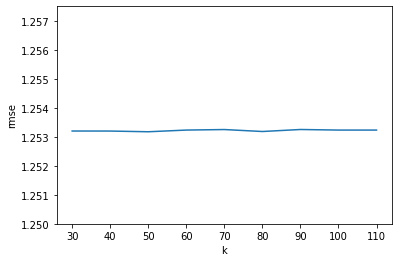

In [35]:
import matplotlib.pyplot as plt 
plt.plot(index , [x[2] for x in summary]) 
plt.ylim(1.2500 , 1.2575)
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()

# 4. Surprise

In [36]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630154 sha256=717d73a3ab7dde96d5c560b3bfc60a803618257aca0ae77427d4e3df23397b37
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [37]:
from hashlib import algorithms_available
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV


# surprise는 무조건 데이터 순서가 User_Id, Item_Id, Ratings 순서여야 한다!
sports_3 = sports_3[['User_Id', 'Item_Id', 'Review_Rating']]    # 컬럼 순서 변경
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(sports_3,reader)

train_data,test_data = train_test_split(data, test_size=0.25, random_state=42)

Estimating biases using als...
RMSE: 1.2493
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3361
RMSE: 1.2961


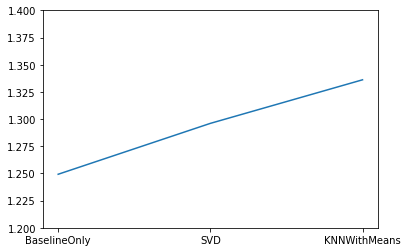

In [38]:
# 1) 디폴트값으로 KNNWithMeans, SVD, SVD++ 성능 체크
algorithms = [BaselineOnly, KNNWithMeans, SVD]   # SVD++은 너무 오래 걸려 일단 보류
# BaselineOnly : User평점평균 Item평점평균 모델화하여 예측하는 알고리즘
# KNNWithMeans : 사용자의 평가경향을 고려한 알고리즘
# SVD : MF알고리즘
# SVDpp : SVD++알고리즘 --> 사용자의 implicit data를 고려한 알고리즘

names, results = [],[]

for single_algo in algorithms:
  algo = single_algo()
  names.append(single_algo.__name__)
  algo.fit(train_data)
  pred = algo.test(test_data)
  results.append(accuracy.rmse(pred))

names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(1.2,1.4)
plt.plot(names[index],results[index])
plt.show()  

In [39]:
# sports_2는 UBCF가 램이 터진다
# --> IBCF 사용시 램이 안터질까?
sports_2 = sports_2[['User_Id', 'Item_Id', 'Review_Rating']]
data_2 = Dataset.load_from_df(sports_2,reader)

train_set,test_set = train_test_split(data,test_size=0.25,random_state=42)

result = []
sim_options = {'name' : 'cosine', 'user_based' : False}

for k in range(10,70,10):
  algo = KNNWithMeans(k=k, sim_options=sim_options)
  algo.fit(train_set)
  pred = algo.test(test_set)
  result.append([k, accuracy.rmse(pred)])

print(result)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3158
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2935
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2870
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2845
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2834
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2835
[[10, 1.3158173408607203], [20, 1.2934644621148748], [30, 1.2869609653313583], [40, 1.2845245534834664], [50, 1.2833835785797167], [60, 1.2835478642497067]]


# 5. NCF

In [40]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax
from sklearn.utils import shuffle

In [41]:
# train_test_split & shuffle
train_size = 0.75
sports_2 = shuffle(sports_2)
cutoff = int(train_size * len(sports_2))
sports_train = sports_2.iloc[:cutoff]
sports_test = sports_2.iloc[cutoff:]
print(len(sports_train))
print(len(sports_test))

224412
74804


In [42]:
# Variables
k = 100
mu = sports_train['Review_Rating'].mean()
m = sports_train['User_Id'].max() + 1
n = sports_test['Item_Id'].max() + 1

print(mu,'\n',m,'\n',n)

def rmse(y_true,y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))  # tensorflow에 포함된 square(제곱), reduce_mean(평균), sqrt(제곱근) 사용


user = Input(shape=(1, ))
item = Input(shape=(1, ))
p_embedding = Embedding(m,k, embeddings_regularizer=l2())(user)
q_embedding = Embedding(n,k, embeddings_regularizer=l2())(item)
user_bias = Embedding(m,1, embeddings_regularizer=l2())(user)
item_bias = Embedding(n,1, embeddings_regularizer=l2())(item)

p_embedding = Flatten()(p_embedding)
q_embedding = Flatten()(q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)
r = Concatenate()([p_embedding, q_embedding, user_bias, item_bias])  # 노드 수 202

# Dense Layer
r = Dense(2048)(r)
r = Activation('linear')(r)
r = Dense(256)(r)
r = Activation('linear')(r)
r = Dense(1)(r)

model = Model(inputs=[user,item], outputs=r)
model.compile(loss=rmse, optimizer=SGD(), metrics=[rmse])
model.summary()

4.254491738409711 
 193478 
 96
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       19347800    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       9600        ['input_2[0][0]']                
                                                              

In [43]:
result = model.fit(x=[sports_train['User_Id'].values, sports_train['Item_Id'].values],
                   y=sports_train['Review_Rating'].values - mu, epochs=40, batch_size=256,
                   validation_data = ([sports_test['User_Id'].values, sports_test['Item_Id'].values],
                                      sports_test['Review_Rating'].values-mu
                                      )
                   )

Epoch 1/40
877/877 [==============================] - 20s 19ms/step - loss: 138.7009 - rmse: 1.2654 - val_loss: 115.9633 - val_rmse: 1.2599
Epoch 2/40
877/877 [==============================] - 15s 17ms/step - loss: 98.0269 - rmse: 1.2579 - val_loss: 82.0138 - val_rmse: 1.2496
Epoch 3/40
877/877 [==============================] - 15s 17ms/step - loss: 69.3825 - rmse: 1.2455 - val_loss: 58.1045 - val_rmse: 1.2359
Epoch 4/40
877/877 [==============================] - 15s 17ms/step - loss: 49.2133 - rmse: 1.2359 - val_loss: 41.2732 - val_rmse: 1.2298
Epoch 5/40
877/877 [==============================] - 15s 17ms/step - loss: 35.0155 - rmse: 1.2329 - val_loss: 29.4245 - val_rmse: 1.2284
Epoch 6/40
877/877 [==============================] - 16s 19ms/step - loss: 25.0195 - rmse: 1.2321 - val_loss: 21.0820 - val_rmse: 1.2279
Epoch 7/40
877/877 [==============================] - 16s 19ms/step - loss: 17.9813 - rmse: 1.2316 - val_loss: 15.2078 - val_rmse: 1.2274
Epoch 8/40
877/877 [============

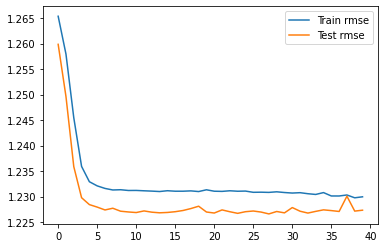

In [44]:
plt.plot(result.history['rmse'], label='Train rmse')
plt.plot(result.history['val_rmse'], label='Test rmse')
plt.legend()
plt.show()

# 6. Hybrid 모델



In [45]:
# 1) IBCF + MF
from sklearn.model_selection import train_test_split

X = sports_2.copy()
y = sports_2['User_Id']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)

# 아이템별 평가 경향까지 고려!
rating_matrix = X_train.pivot_table(index='User_Id',columns='Item_Id',values='Review_Rating')
rating_matrix_t = rating_matrix.T
matrix_dummy = rating_matrix_t.fillna(0)
item_sim = cosine_similarity(matrix_dummy,matrix_dummy)
item_sim = pd.DataFrame(item_sim,index=rating_matrix_t.index, columns=rating_matrix_t.index)

rating_mean_item = rating_matrix_t.mean(axis=1)
rating_bias_item = (rating_matrix_t.T - rating_mean_item).T

def score(model,neighbor_size=0):
  id_pairs = zip(X_test['User_Id'],X_test['Item_Id'])
  y_pred = np.array([model(user,movie,neighbor_size) for (user,movie) in id_pairs])   
  y_true = np.array(X_test['Review_Rating'])
  return RMSE(y_true,y_pred)


def ibcf(user_id,item_id,neighbor_size=0):
  if user_id in rating_bias_item:
    sim_scores = item_sim[item_id]
    user_ratings = rating_bias_item[user_id]
    non_rating_idx = user_ratings[user_ratings.isnull()].index
    user_ratings = user_ratings.drop(non_rating_idx)
    sim_scores = sim_scores.drop(non_rating_idx)
  
    if neighbor_size == 0:
      pred = np.dot(sim_scores, user_ratings) / sim_scores.sum()
      pred = pred + rating_mean_item[item_id]
    
    else:
      if len(sim_scores) > 1:
        if neighbor_size <= len(sim_scores):
          neighbor_size = neighbor_size
          sim_scores = np.array(sim_scores)
          user_ratings = np.array(user_ratings)
          item_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[item_idx][-neighbor_size:]
          user_ratings = user_ratings[item_idx][-neighbor_size:]

          pred = np.dot(sim_scores,user_ratings) / sim_scores.sum()
          pred = pred + rating_mean_item[item_id]

        else:
          neighbor_size = len(sim_scores)
          sim_scores = np.array(sim_scores)
          user_ratings = np.array(user_ratings)
          item_idx = np.argsort(sim_scores)
          sim_scores = sim_scores[item_idx][-neighbor_size:]
          user_ratings = user_ratings[item_idx][-neighbor_size:]

          pred = np.dot(sim_scores,user_ratings) / sim_scores.sum()
          pred = pred + rating_mean_item[item_id]

      else:
        pred = rating_mean_item[item_id]
  
  else:
    pred = rating_mean_item[item_id]
  return pred


class MF():
  
  def __init__(self, ratings, k, alpha, beta, iterations, verbose=True) :
    self.R = np.array(ratings)

    # user_id, item_id를 self.R의 인덱스와 매핑하기 위한 Dictionary 생성
    item_id_index = []
    index_item_id = []
    for idx, one_id in enumerate(ratings):
      item_id_index.append([one_id,idx])
      index_item_id.append([idx,one_id])
    self.item_id_index = dict(item_id_index)
    self.index_item_id = dict(index_item_id)

    user_id_index = []
    index_user_id = []
    for idx, one_id in enumerate(ratings.T):
      user_id_index.append([one_id,idx])
      index_user_id.append([idx,one_id])
    self.user_id_index = dict(user_id_index)
    self.index_user_id = dict(index_user_id)

    self.num_users, self.num_items = np.shape(self.R)
    self.k = k
    self.alpha = alpha
    self.beta = beta
    self.iterations = iterations
    self.verbose = verbose

  # train_set의 RMSE 계산
  def RMSE(self):
    xs,ys = self.R.nonzero()
    self.predictions = []
    self.errors = []
    for x,y in zip(xs,ys):
      prediction = self.get_prediction(x,y)
      self.predictions.append(prediction)
      self.errors.append(self.R[x,y] - prediction)
    self.predictions = np.array(self.predictions)
    self.errors = np.array(self.errors)
    
    return np.sqrt(np.mean(self.errors **2))
  
  def get_prediction(self,i,j):
    prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i,:].dot(self.Q[j,:].T)
    return prediction

  def sgd(self):
    for i,j,r in self.samples:
      prediction = self.get_prediction(i,j)
      e = (r-prediction)

      self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
      self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

      self.P[i,:] += self.alpha * (e * self.Q[j,:] - self.beta * self.P[i,:])
      self.Q[j,:] += self.alpha * (e * self.P[i,:] - self.beta * self.Q[j,:])
  
  # set_test : test 데이터셋 선정
  def set_test(self,ratings):
    test_set = []
    for i in range(len(X_test)):   # test데이터셋에 있는 각 데이터에 대해
      x = self.user_id_index[X_test.iloc[i,0]]  # 유저별 인덱스 x에 저장
      y = self.item_id_index[X_test.iloc[i,1]]  # 아이템별 인덱스 y에 저장
      z = X_test.iloc[i,2]   # 유저-아이템 평점은 z에 저장
      test_set.append([x,y,z])
      self.R[x,y] = 0    # R에서의 test_set의 x,y 부분 평점값은 전부 0으로 설정 --> MF에서 test_set 부분을 학습하면 안되므로!
    self.test_set = test_set
    return test_set
  
  # test 데이터셋의 rmse 계산
  def test_RMSE(self):
    error = 0
    for one_set in self.test_set:
      predicted = self.get_prediction(one_set[0], one_set[1])
      error += pow(one_set[2] - predicted,2)
    
    return np.sqrt(error / len(self.test_set))
  
  # test 데이터셋의 정확도를 훈련하면서 계산
  def test(self):
    self.P = np.random.normal(scale= 1./self.k, size=(self.num_users, self.k))
    self.Q = np.random.normal(scale= 1./self.k, size=(self.num_items, self.k))

    # 평가경향 고려
    self.b_u = np.zeros(self.num_users)
    self.b_d = np.zeros(self.num_items)
    self.b = np.mean(self.R[self.R.nonzero()])

    rows,columns = self.R.nonzero()
    self.samples = [(i,j,self.R[i,j]) for i,j in zip(rows,columns)]

    training_process = []
    for i in range(self.iterations):
      np.random.shuffle(self.samples)
      self.sgd()
      rmse_1 = self.RMSE()
      rmse_2 = self.test_RMSE()
      training_process.append((i+1, rmse_1, rmse_2))

      if self.verbose:
        if (i+1) % 10 == 0:
          print("Iteration: %d ; Train RMSE = %.4f ; Test RMSE = %.4f" % (i+1, rmse_1, rmse_2))
    return training_process
  
  # 1명의 유저의 특정 아이템에 대한 예측
  def get_one_prediction(self,user_id,item_id):
    return self.get_prediction(self.user_id_index[user_id], self.item_id_index[item_id])
  
  def get_full_prediction(self):
    return self.b + self.b_u[:,np.newaxis] + self.b_d[np.newaxis,:] + self.P.dot(self.Q.T)


R_temp = X.pivot_table(index='User_Id', columns='Item_Id', values='Review_Rating').fillna(0)
mf_train_test = MF(R_temp,k=30,alpha=0.001,beta=0.02,iterations=100,verbose=True)
test_set = mf_train_test.set_test(X_test)
result = mf_train_test.test()

Iteration: 10 ; Train RMSE = 1.2087 ; Test RMSE = 1.2267
Iteration: 20 ; Train RMSE = 1.1962 ; Test RMSE = 1.2269
Iteration: 30 ; Train RMSE = 1.1827 ; Test RMSE = 1.2273
Iteration: 40 ; Train RMSE = 1.1660 ; Test RMSE = 1.2278
Iteration: 50 ; Train RMSE = 1.1413 ; Test RMSE = 1.2283
Iteration: 60 ; Train RMSE = 1.1002 ; Test RMSE = 1.2289
Iteration: 70 ; Train RMSE = 1.0368 ; Test RMSE = 1.2302
Iteration: 80 ; Train RMSE = 0.9565 ; Test RMSE = 1.2321
Iteration: 90 ; Train RMSE = 0.8685 ; Test RMSE = 1.2346
Iteration: 100 ; Train RMSE = 0.7793 ; Test RMSE = 1.2378


In [46]:
def rmse_2(y_true, y_pred):
  return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def recommender_0(recomm_list,mf):
  recomm = np.array([mf_train_test.get_one_prediction(user,item) for (user,item) in recomm_list])
  return recomm

def recommender_1(recomm_list,neighbor_size=0):
  recomm = np.array([ibcf(user,item,neighbor_size) for (user,item) in recomm_list])
  return recomm

recomm_list = np.array(X_test.iloc[:,[0,1]])
pred_0 = recommender_0(recomm_list,MF)
print(rmse_2(X_test.iloc[:, 2], pred_0))
pred_1 = np.ravel(recommender_1(recomm_list, 50),order='C')
print(rmse_2(X_test.iloc[:, 2], pred_1))


for i in np.arange(0,1,0.01):
  weight = [i, 1.0-i]
  predictions = pred_0 * weight[0] + pred_1 * weight[1]
  print("Weights - %.2f : %.2f ; RMSE = %.7f" % (weight[0], weight[1], rmse_2(X_test.iloc[:, 2], predictions)))
# 평가지표 ibcf : 0.68 & MF : 0.32 일때 성능이 제일 좋게 나오는 것으로 확인

1.2377834701491626
1.2496614558503067
Weights - 0.00 : 1.00 ; RMSE = 1.2496615
Weights - 0.01 : 0.99 ; RMSE = 1.2492706
Weights - 0.02 : 0.98 ; RMSE = 1.2488851
Weights - 0.03 : 0.97 ; RMSE = 1.2485051
Weights - 0.04 : 0.96 ; RMSE = 1.2481304
Weights - 0.05 : 0.95 ; RMSE = 1.2477611
Weights - 0.06 : 0.94 ; RMSE = 1.2473973
Weights - 0.07 : 0.93 ; RMSE = 1.2470388
Weights - 0.08 : 0.92 ; RMSE = 1.2466858
Weights - 0.09 : 0.91 ; RMSE = 1.2463382
Weights - 0.10 : 0.90 ; RMSE = 1.2459960
Weights - 0.11 : 0.89 ; RMSE = 1.2456592
Weights - 0.12 : 0.88 ; RMSE = 1.2453279
Weights - 0.13 : 0.87 ; RMSE = 1.2450020
Weights - 0.14 : 0.86 ; RMSE = 1.2446816
Weights - 0.15 : 0.85 ; RMSE = 1.2443666
Weights - 0.16 : 0.84 ; RMSE = 1.2440570
Weights - 0.17 : 0.83 ; RMSE = 1.2437529
Weights - 0.18 : 0.82 ; RMSE = 1.2434543
Weights - 0.19 : 0.81 ; RMSE = 1.2431611
Weights - 0.20 : 0.80 ; RMSE = 1.2428734
Weights - 0.21 : 0.79 ; RMSE = 1.2425912
Weights - 0.22 : 0.78 ; RMSE = 1.2423145
Weights - 0.23 : 0.

In [47]:
# 2) MF & DL : 이미 위에서 학습을 마쳤으므로 모델만 로드!


def recommender_0(recomm_list,mf):
  recomm = np.array([mf_train_test.get_one_prediction(user,movie) for (user,movie) in recomm_list])
  return recomm

def recommender_2(recomm_list):
  recomm = model.predict([X_test['User_Id'].values, X_test['Item_Id'].values]) + mu
  return recomm

recomm_list = np.array(X_test.iloc[:,[0,1]])
pred_0 = recommender_0(recomm_list,MF)
print(rmse_2(X_test.iloc[:, 2], pred_0))
pred_2 = np.ravel(recommender_2(recomm_list),order='C')
print(rmse_2(X_test.iloc[:, 2], pred_2))

weight = [0.8, 0.2]
predictions = pred_0 * weight[0] + pred_2 * weight[1]
print(rmse_2(X_test.iloc[:,2], predictions))


for i in np.arange(0,1,0.01):
  weight = [i, 1.0-i]
  predictions = pred_0 * weight[0] + pred_1 * weight[1]
  print("Weights - %.2f : %.2f ; RMSE = %.7f" % (weight[0], weight[1], rmse_2(X_test.iloc[:, 2], predictions)))

1.2377834701491626
1.2252950092527972
1.233120659133091
Weights - 0.00 : 1.00 ; RMSE = 1.2496615
Weights - 0.01 : 0.99 ; RMSE = 1.2492706
Weights - 0.02 : 0.98 ; RMSE = 1.2488851
Weights - 0.03 : 0.97 ; RMSE = 1.2485051
Weights - 0.04 : 0.96 ; RMSE = 1.2481304
Weights - 0.05 : 0.95 ; RMSE = 1.2477611
Weights - 0.06 : 0.94 ; RMSE = 1.2473973
Weights - 0.07 : 0.93 ; RMSE = 1.2470388
Weights - 0.08 : 0.92 ; RMSE = 1.2466858
Weights - 0.09 : 0.91 ; RMSE = 1.2463382
Weights - 0.10 : 0.90 ; RMSE = 1.2459960
Weights - 0.11 : 0.89 ; RMSE = 1.2456592
Weights - 0.12 : 0.88 ; RMSE = 1.2453279
Weights - 0.13 : 0.87 ; RMSE = 1.2450020
Weights - 0.14 : 0.86 ; RMSE = 1.2446816
Weights - 0.15 : 0.85 ; RMSE = 1.2443666
Weights - 0.16 : 0.84 ; RMSE = 1.2440570
Weights - 0.17 : 0.83 ; RMSE = 1.2437529
Weights - 0.18 : 0.82 ; RMSE = 1.2434543
Weights - 0.19 : 0.81 ; RMSE = 1.2431611
Weights - 0.20 : 0.80 ; RMSE = 1.2428734
Weights - 0.21 : 0.79 ; RMSE = 1.2425912
Weights - 0.22 : 0.78 ; RMSE = 1.2423145
W